In [1]:
import ee
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWgo6tfasv2uWeMTdVoZ1zu5BqGIYMlPQCJnZNCQgjxBdDns_AwKjSs

Successfully saved authorization token.


In [31]:
# Define lon and lat of interest
lon0 = -4.36666667
lat0 = 50.03333333

# Define time window of interest
start_date = '2013-01-01'
end_date = '2014-01-01'

# Define scale (?)
scale = 1000 # what is this???????

# Get image collections for modis and landsat
def get_data(name,lon,lat):
    # Extract image collection
    cntr = ee.Geometry.Point(lon,lat)
    ic = ee.ImageCollection(name).filterDate(start_date,end_date)
    # Turn into array
    info = ic.getRegion(cntr,scale).getInfo()
    # Turn into dataframe
    header = info[0]
    data = info[1:]
    df = pd.DataFrame(data,columns=header)
    # Convert time to datetime
    df.time = pd.to_datetime(df.time, unit='ms')
    return df

df_modis = get_data('NASA/OCEANDATA/MODIS-Aqua/L3SMI',lon0,lat0)

In [32]:
datapath = 'C:/Users/eeaaas/Downloads/western_channel_observatory_'
E1_T = pd.read_csv(datapath+'e1_ctd_temperature_and_satellite.csv',header=958)
E1_S = pd.read_csv(datapath+'e1_ctd_salinity.csv',header=764)

In [33]:
E1_T.columns=['Date','Temp0m','Temp10m','Temp20m','Temp30m','Temp40m','Temp50m','Temp60m','Temp70m','Temp80m','-']
E1_S.columns=['Date','Sal0m','Sal10m','Sal20m','Sal30m','Sal40m','Sal50m','Sal60m','Sal70m','Sal80m','-']

In [34]:
from datetime import datetime

dates = ['Jan 23 2013 12:00PM','Feb 12 2013 12:00PM','Feb 27 2013 12:00PM','Mar 20 2013 12:00PM','Apr 23 2013 12:00PM', 'May 1 2013 12:00PM','May 16 2013 12:00PM','Jun 4 2013 12:00PM','Jun 18 2013 12:00PM','Jul 2 2013 12:00PM','Jul 16 2013 12:00PM','Aug 7 2013 12:00PM','Aug 20 2013 12:00PM','Sep 3 2013 12:00PM','Sep 24 2013 12:00PM','Oct 15 2013 12:00PM','Nov 12 2013 12:00PM','Nov 26 2013 12:00PM']
datetime_objects = []
timestamps = []
for d in dates:
    datetime_objects.append(datetime.strptime(d, '%b %d %Y %I:%M%p'))
    
for i in datetime_objects:
    timestamps.append(datetime.timestamp(i))

In [35]:
timestamp_array = []
for i in timestamps:
    timestamp_array.append((int(i)))

In [36]:
dts = []
for i in timestamp_array:
    dts.append(datetime.fromtimestamp(i))

[Text(0, 0.5, 'SST')]

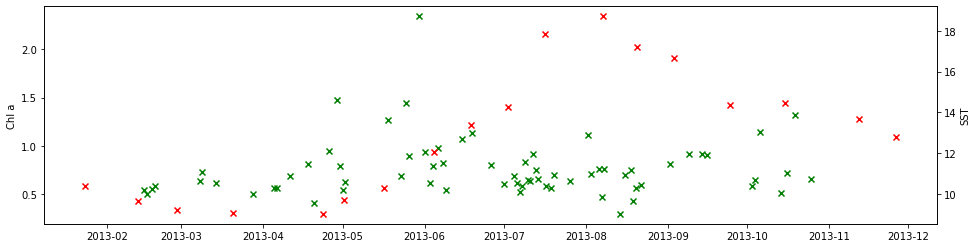

In [38]:
x=df_modis['time']
y1=df_modis['chlor_a']

fig, ax1 = plt.subplots(1,1,figsize=(16,4))
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='g', marker='x')
ax2.scatter(dts,E1_T.Temp0m[46:64],c='r',marker='x')
ax1.set(ylabel='Chl a')
ax2.set(ylabel='SST')


In [10]:
E1_Nut = pd.read_csv('C:/Users/eeaaas/Downloads/e1_nutrients.csv',header=1353)
E1_Nut.columns = ['E1','Date','Depth','Nitrite','Nit+Nat','Ammonia','Silicate','Phosphate','-','-','-']

In [12]:
E1_Nut['Nitrite'][E1_Nut['Depth']==0][120]

np.arange(0,108,6)

E1_Nuts = []
for i in np.arange(0,108,6):
    E1_Nuts.append((E1_Nut['Nit+Nat'][E1_Nut['Depth']==0]+E1_Nut.Ammonia[E1_Nut['Depth']==0]+E1_Nut.Silicate[E1_Nut['Depth']==0]+E1_Nut.Phosphate[E1_Nut['Depth']==0])[i])


#18 numbers

[Text(0, 0.5, 'Nutrients (um)')]

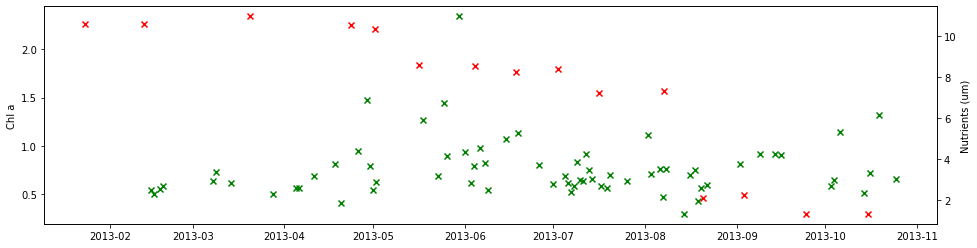

In [13]:
x=df_modis['time']
y1=df_modis['chlor_a']

fig, ax1 = plt.subplots(1,1,figsize=(16,4))
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='g', marker='x')
ax2.scatter(dts,E1_Nuts,c='r',marker='x')
ax1.set(ylabel='Chl a')
ax2.set(ylabel='Nutrients (um)')

In [ ]:
###KALMAN FILTER

In [14]:
# Define lon and lat of interest
lon0 = -4.36666667
lat0 = 50.03333333

# Define time window of interest
start_date = '2018-01-01'
end_date = '2019-01-01'

# Define scale (?)
scale = 1000 # what is this???????

# Get image collections for modis and landsat
def get_data(name,lon,lat):
    # Extract image collection
    cntr = ee.Geometry.Point(lon,lat)
    ic = ee.ImageCollection(name).filterDate(start_date,end_date)
    # Turn into array
    info = ic.getRegion(cntr,scale).getInfo()
    # Turn into dataframe
    header = info[0]
    data = info[1:]
    df = pd.DataFrame(data,columns=header)
    # Convert time to datetime
    df.time = pd.to_datetime(df.time, unit='ms')
    return df

df_modis = get_data('NASA/OCEANDATA/MODIS-Aqua/L3SMI',lon0,lat0)

In [17]:
datapath = 'C:/Users/eeaaas/Downloads/western_channel_observatory_'
E1_T = pd.read_csv(datapath+'e1_ctd_temperature_and_satellite.csv',header=1095)
E1_S = pd.read_csv(datapath+'e1_ctd_salinity.csv',header=901)

In [18]:
E1_T.columns=['Date','Temp0m','Temp10m','Temp20m','Temp30m','Temp40m','Temp50m','Temp60m','Temp70m','Temp80m','-']
E1_S.columns=['Date','Sal0m','Sal10m','Sal20m','Sal30m','Sal40m','Sal50m','Sal60m','Sal70m','Sal80m','-']

In [19]:
from datetime import datetime

dates = ['Jan 10 2018 12:00PM','Feb 2 2018 12:00PM','Mar 6 2018 12:00PM','Apr 9 2018 12:00PM','Apr 24 2018 12:00PM', 'May 23 2018 12:00PM','Jun 5 2018 12:00PM','Jun 19 2018 12:00PM','Jul 3 2018 12:00PM','Jul 24 2018 12:00PM','Aug 7 2018 12:00PM','Aug 21 2018 12:00PM','Sep 4 2018 12:00PM','Sep 25 2018 12:00PM','Oct 9 2018 12:00PM','Oct 23 2018 12:00PM','Dec 4 2018 12:00PM']
datetime_objects = []
timestamps = []
for d in dates:
    datetime_objects.append(datetime.strptime(d, '%b %d %Y %I:%M%p'))
    
for i in datetime_objects:
    timestamps.append(datetime.timestamp(i))

In [20]:
timestamp_array = []
for i in timestamps:
    timestamp_array.append((int(i)))

In [21]:
dts = []
for i in timestamp_array:
    dts.append(datetime.fromtimestamp(i))

[Text(0, 0.5, 'SST')]

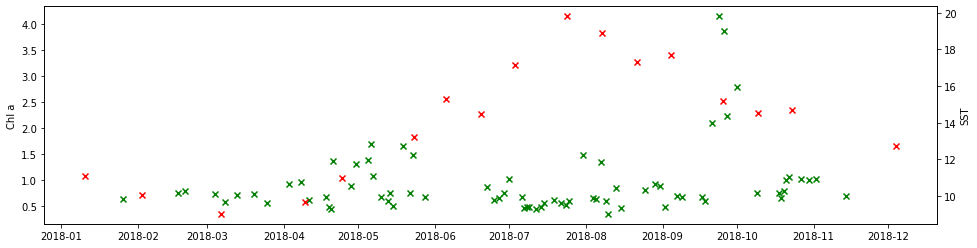

In [25]:
x=df_modis['time']
y1=df_modis['chlor_a']

fig, ax1 = plt.subplots(1,1,figsize=(16,4))
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='g', marker='x')
ax2.scatter(dts,E1_T.Temp0m[:17],c='r',marker='x')
ax1.set(ylabel='Chl a')
ax2.set(ylabel='SST')


[Text(0, 0.5, 'SSS')]

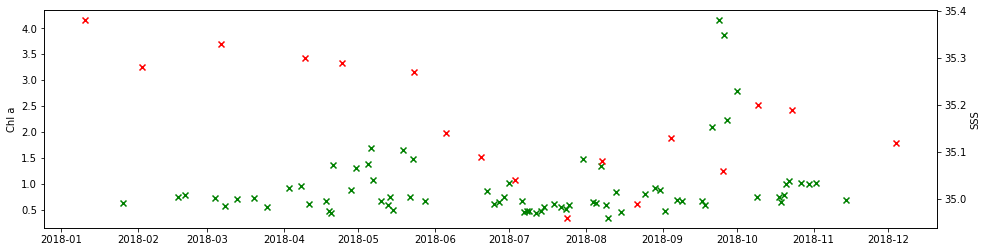

In [26]:
x=df_modis['time']
y1=df_modis['chlor_a']

fig, ax1 = plt.subplots(1,1,figsize=(16,4))
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='g', marker='x')
ax2.scatter(dts,E1_S.Sal0m[:17],c='r',marker='x')
ax1.set(ylabel='Chl a')
ax2.set(ylabel='SSS')

In [27]:
E1_Nut = pd.read_csv('C:/Users/eeaaas/Downloads/e1_nutrients.csv',header=2457)
E1_Nut.columns = ['E1','Date','Depth','Nitrite','Nit+Nat','Ammonia','Silicate','Phosphate','-','-','-']

In [29]:
E1_Nuts = []
for i in np.arange(0,102,6):
    E1_Nuts.append((E1_Nut['Nit+Nat'][E1_Nut['Depth']==0]+E1_Nut.Ammonia[E1_Nut['Depth']==0]+E1_Nut.Silicate[E1_Nut['Depth']==0]+E1_Nut.Phosphate[E1_Nut['Depth']==0])[i])

[Text(0, 0.5, 'Nutrients (um)')]

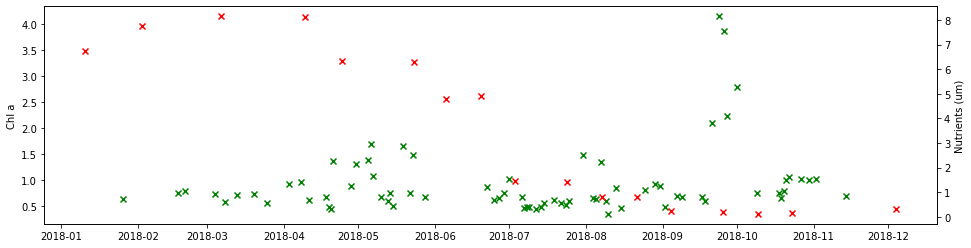

In [30]:
x=df_modis['time']
y1=df_modis['chlor_a']

fig, ax1 = plt.subplots(1,1,figsize=(16,4))
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='g', marker='x')
ax2.scatter(dts,E1_Nuts,c='r',marker='x')
ax1.set(ylabel='Chl a')
ax2.set(ylabel='Nutrients (um)')